In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

## 請安裝
> pip install opencv-python

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [3]:
img = cv2.imread('data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #將opencv讀進來的BGR轉回RGB

## 1-1. cluster with only RGB values

In [13]:
def km_clust(array, n_clusters):   #n_clusters:分成幾群
    # Define the k-means clustering problem
    k_m = KMeans(n_clusters = n_clusters)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    center = k_m.cluster_centers_
    print(center)
    # Get the label of each point
    label = k_m.labels_ # 分成幾群就有幾個labels
    return(label, center)

(1024, 1024, 3)
[[163.22859086 197.7362862  120.58704586]
 [107.74581965  95.6125244   71.64107115]]
[[160.64844707 204.76640415 114.70077794]
 [ 57.3685989   54.42419245  45.83348083]
 [143.49173289 127.81718869  96.66494845]
 [183.66996244 182.35332544 164.37430225]]


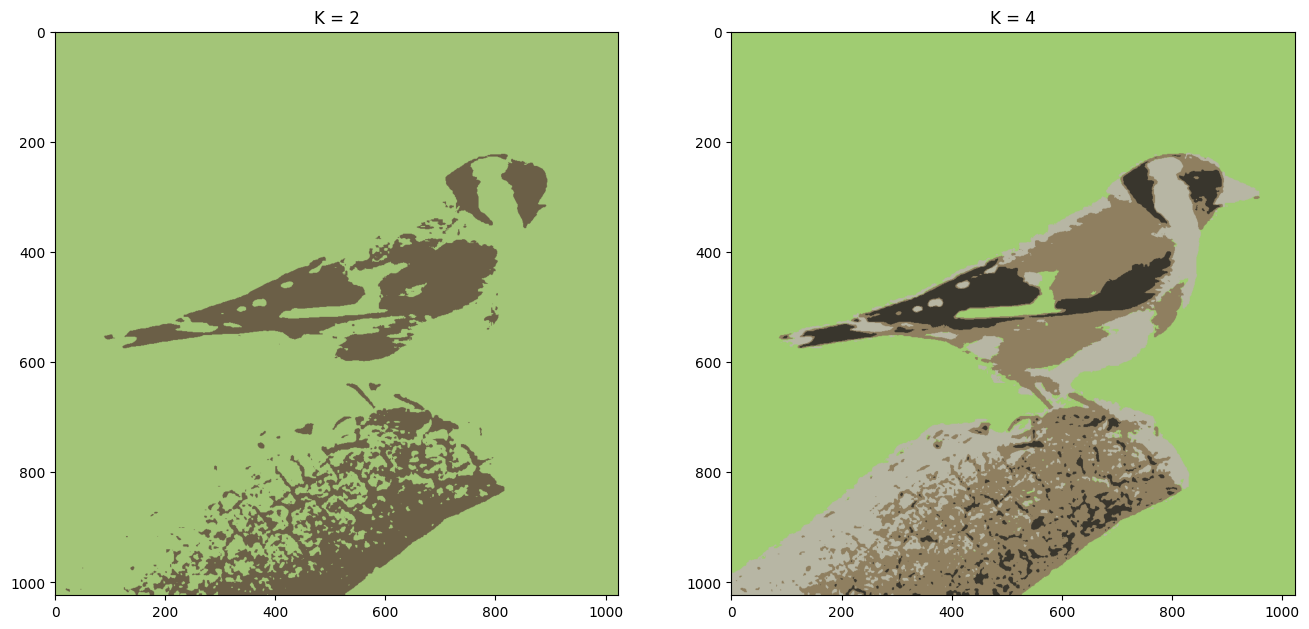

In [36]:
h, w, c = img.shape # 長、寬、影像的channel(3是彩色)
print(img.shape)
Z=img.reshape((-1,3)) #降維後，每筆資料都有RGB的特徵值
Ka = [2,4,8,16,32]
Z.shape
plt.figure(figsize=(16,12))

for i,K in enumerate(Ka):
    label, center = km_clust(Z,K)
     # Now convert back into uint8, and make original image
    center = np.uint8(center[:,:3])
    res = center[label.flatten()] #label是0時，取代為[163、197、120]，是1則取代為 [107  95  71]
    res =res.reshape(img.shape) #最終結果，將維度變回去
    plt.subplot(1,len(Ka),i+1)
    plt.title("K = {}".format(K))
    plt.imshow(res)



## 1-2. cluster with RGB values and the location

[[154.50996487 186.73646679 117.16038709 510.38021636 254.15862306]
 [156.3751072  180.1262646  110.32085177 512.60807257 766.15001594]]
[[156.98929726 178.95525965 122.6050012  766.20726024 255.76941629]
 [155.57320904 177.42536615 109.23891699 257.35405748 766.67485553]
 [157.19054906 183.10018179 111.52127439 769.04346542 767.98772321]
 [152.0188722  194.29518354 111.49170529 253.88564271 254.90161444]]
[[152.47789153 193.81130376 110.90333419 151.3265545  244.27081155]
 [143.63622192 155.03671315  95.5432908  422.62635925 525.27659574]
 [164.72740207 188.41688022 134.68850468 852.15385063 174.30258428]
 [160.02802642 201.73647403 118.09490004 857.72728475 855.86088207]
 [156.52785116 183.97062787 112.62690789 150.74638435 783.04358123]
 [156.89957919 202.60864855 117.39727888 502.29044389 171.43107699]
 [165.54158446 199.30345188 119.56541205 508.24798064 864.26448964]
 [146.78461164 146.9513275  104.92008442 820.69483021 519.48650364]]
[[168.52765395 189.11860657 143.85925376 908.

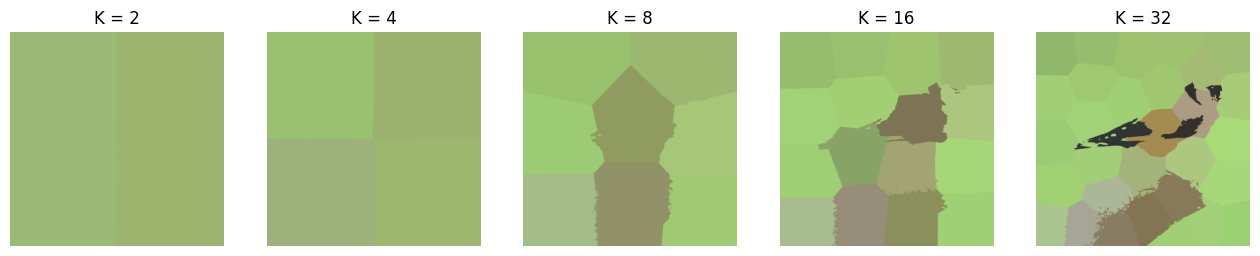

In [42]:
h, w, c = img.shape #讀取影像的維度

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h], [w]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-3. explain the differences between the two methods under the same K.
![](images/7.4_result.PNG)

第一種方法以色彩去區分，效果比較好

第二種方法以位置區分，鄰近的區域會是一樣的色彩

改進方式:將照片的大小縮放跟pixel的大小一樣(原始大小為1024x1024，要與pixel(256)相同)

[[158.3539023  193.95203503 120.15833021 121.02382333  61.0517    ]
 [152.86601566 174.05446023 108.00668418 133.95998225 187.22518372]]
[[167.56307011 206.07428177 123.00930628 169.1531505  211.8433065 ]
 [113.96308437 101.84727253  75.79726287 173.05989508 137.9937669 ]
 [166.0952531  199.62320268 129.67734704 168.27605422  51.55722331]
 [157.92544561 192.82742333 112.34578258  45.88670115 124.21146222]]
[[160.73280906 142.08801432 101.4924519  121.95477871 154.66522434]
 [167.75714504 201.38489933 132.84031637 184.340512    51.78438403]
 [172.77039797 212.59501631 126.72308159 132.04919201 217.56381347]
 [159.89494936 194.8160665  113.8327651   37.16476184 184.94650567]
 [ 46.29411765  47.4933444   45.71192818 117.07920548 136.40257272]
 [161.99248765 208.28128943 120.11308979 220.86338836 211.82347417]
 [132.99737267 120.64784371  91.38896708 218.29564051 127.48092369]
 [156.29808498 200.38449849 113.45714939  59.85101471  60.33705999]]
[[144.39062467 135.55415838 115.11731999 229.

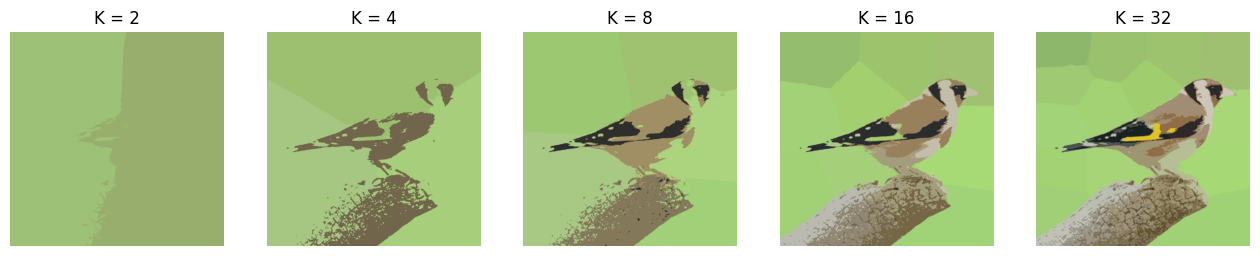

In [48]:
h, w, c = img.shape #讀取影像的維度

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h/4], [w/4]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

In [ ]:
調整圖片範圍後，可以抓出正確的顏色和空間分布